## LOAD DATASET

In [1]:
train_dir = 'Carrot Data/train/'
validation_dir = 'Carrot Data/validation/'

In [2]:
train_fresh = train_dir + 'Fresh'
train_rotten = train_dir + 'Rotten'
validation_fresh = validation_dir + 'Fresh'
validation_rotten = validation_dir + 'Rotten'

In [3]:
import os
train_fresh_names = os.listdir(train_fresh)
train_rotten_names = os.listdir(train_rotten)
validation_fresh_names = os.listdir(validation_fresh)
validation_rotten_names = os.listdir(validation_rotten)


In [4]:
print(len(train_fresh_names))
print(len(train_rotten_names))
print(len(validation_fresh_names))
print(len(validation_rotten_names))

496
464
124
116


## PREPROCESSING DATASET

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import pandas as pd
import tensorflow.keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_data = validation_datagen.flow_from_directory(
    validation_dir,
    class_mode='categorical',
    target_size=(256, 256),
    batch_size=16,
    shuffle=False
)

Found 240 images belonging to 2 classes.


In [7]:
validation_data.class_indices

{'Fresh': 0, 'Rotten': 1}

## BUILDING THE MODEL

In [8]:
from keras.models import load_model

model = load_model('Model/dropout/do20%.h5')

## EVALUATE MODEL

In [9]:
import matplotlib.pyplot as plt
#import numpy
#from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for test data
y_pred = model.predict(validation_data).argmax(axis=1)  # Predicted labels
y_true = validation_data.classes  # Ground truth labels

cm = confusion_matrix(y_true, y_pred)

cm

15/15 [==============================] - 11s 652ms/step


array([[118,   6],
       [  8, 108]], dtype=int64)

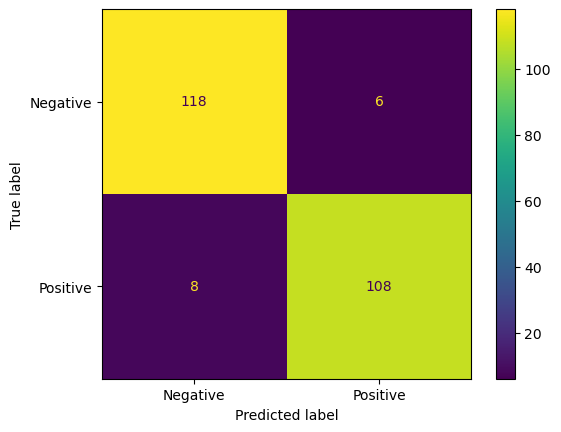

In [10]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative', 'Positive'])

cm_display.plot()
plt.show()

In [11]:
def evaluate_model(cm):
  tp = cm[1][1]
  fn = cm[1][0]
  fp = cm[0][1]
  tn = cm[0][0]

  accuracy = (tp+tn)/(tp+fn+fp+tn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  f1_score = (2*precision*recall)/(precision+recall)

  return accuracy, precision, recall, specificity, f1_score

accuracy, precision, recall, specificity, f1_score = evaluate_model(cm)
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
#print("Specificity: {:.2f}".format(specificity))
print("F1-Score: {:.4f}".format(f1_score))

Accuracy: 0.9417
Precision: 0.9474
Recall: 0.9310
F1-Score: 0.9391


In [12]:
# Validation from cm
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

#Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# F1 Score (which you have already calculated)
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

Accuracy: 0.9416666666666667
Precision: 0.9473684210526315
Recall: 0.9310344827586207
F1 Score: 0.9391304347826087


In [13]:
print(y_true)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
